# DSE 230 - Final Project - Reddit / Stock Conversations Graph

## Import Packages

In [1]:
import pandas as pd
import yfinance as yf
import datetime

## Define Functions

## Load Data

In [2]:
df_posts = pd.read_csv('./data/wsb-aug-2021-posts.csv')
df_comments = pd.read_csv('./data/wsb-aug-2021-comments.csv')

## Clean Data

In [3]:
print(df_posts.shape)
df_posts[df_posts['selftext'].isna()]
df_posts.dropna(subset=['selftext'], inplace=True)
print(df_posts.shape)
df_posts = df_posts[(df_posts['selftext'] != '[removed]') & (df_posts['selftext'] != '[deleted]')]
print(df_posts.shape)

(25751, 12)
(17420, 12)
(766, 12)


In [4]:
print(df_comments.shape)
df_comments[df_comments['body'].isna()]
df_comments.dropna(subset=['body'], inplace=True)
print(df_comments.shape)
df_comments = df_comments[(df_comments['body'] != '[removed]') & (df_comments['body'] != '[deleted]')]
print(df_comments.shape)

(1001160, 10)
(1001158, 10)
(813951, 10)


In [5]:
df_posts['created_utc'] = df_posts['created_utc'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
df_comments['created_utc'] = df_comments['created_utc'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
df_comments['body'] = df_comments['body'].str.replace('\\','')
df_comments['postId_commented_on'] = df_comments['permalink'].str.split('/').str[6]

<ipython-input-5-515e451a960b>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_comments['body'] = df_comments['body'].str.replace('\\','')


In [6]:
clean_posts = df_posts['id'].unique()
df_connected_comments = df_comments[df_comments['postId_commented_on'].isin(clean_posts)]
df_connected_comments.shape

(615920, 11)

In [7]:
df_posts.reset_index(drop=True, inplace=True)
df_comments.reset_index(drop=True, inplace=True)
df_connected_comments.reset_index(drop=True, inplace=True)

In [8]:
df_comments.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score,postId_commented_on
0,comment,hb4hdm3,2th52,wallstreetbets,False,2021-08-31 16:59:54,https://old.reddit.com/r/wallstreetbets/commen...,What's updog,NaN,3,pfdkjw
1,comment,hb4hdm8,2th52,wallstreetbets,False,2021-08-31 16:59:54,https://old.reddit.com/r/wallstreetbets/commen...,Don’t tell em,NaN,1,pfdkjw
2,comment,hb4hdjc,2th52,wallstreetbets,False,2021-08-31 16:59:53,https://old.reddit.com/r/wallstreetbets/commen...,"I realize this, ive been losing thousands shoo...",0.6369,2,pfdkjw
3,comment,hb4hdgo,2th52,wallstreetbets,False,2021-08-31 16:59:52,https://old.reddit.com/r/wallstreetbets/commen...,then it tanks after earnings,0.0000,4,pfgr1h
4,comment,hb4hdeh,2th52,wallstreetbets,False,2021-08-31 16:59:51,https://old.reddit.com/r/wallstreetbets/commen...,Are you saying I should or shouldn’t yolo my l...,0.2732,1,pf3xee


In [9]:
df_posts.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,pfhpj2,2th52,wallstreetbets,False,2021-08-31 16:39:53,https://old.reddit.com/r/wallstreetbets/commen...,self.wallstreetbets,NaN,&amp;#x200B;\n\nhttps://preview.redd.it/bfclvu...,$GENI DD | I'm either a $GENIus or a retard. 2...,73
1,post,pfgew5,2th52,wallstreetbets,False,2021-08-31 15:27:03,https://old.reddit.com/r/wallstreetbets/commen...,self.wallstreetbets,NaN,This started about 4 years ago when my son was...,Am I The Asshole for dropping my 6 year old of...,27876
2,post,pfeq9a,2th52,wallstreetbets,False,2021-08-31 13:58:37,https://old.reddit.com/r/wallstreetbets/commen...,self.wallstreetbets,NaN,\n**Can Workhorse Find the Strength to Bounce ...,$WKHS Is A Sleeping Giant,1
3,post,pfdu9b,2th52,wallstreetbets,False,2021-08-31 13:13:51,https://old.reddit.com/r/wallstreetbets/commen...,self.wallstreetbets,NaN,So I was having a look at the [S-4/A form](htt...,$RKLB: Insiders are incentivized to get the sh...,101
4,post,pfdkjw,2th52,wallstreetbets,False,2021-08-31 13:00:21,https://old.reddit.com/r/wallstreetbets/commen...,self.wallstreetbets,NaN,Your daily trading discussion thread. Please k...,"What Are Your Moves Tomorrow, September 01, 2021",321


In [10]:
df_comments.to_csv('comments_edited.csv', index=False)

## Yahoo Finance

In [11]:
companies = pd.read_csv('./data/Companies.csv')
comps = companies.iloc[:,0]

In [12]:
comp_prices = pd.DataFrame()
for comp in comps:
    tick = yf.Ticker(comp)
    dat = tick.history(start='2020-01-01', end='2021-12-06')
    dat['Delta'] = dat['Close']-dat['Open']
    dat['Ticker'] = comp
    comp_prices = comp_prices.append(dat)
comp_prices = comp_prices.reset_index(drop=False)
comp_prices[['Ticker','Date','Open','Close','Delta']]

,Ticker,Date,Open,Close,Delta
0,AAPL,2020-01-02,72.976007,73.988472,1.012465
1,AAPL,2020-01-03,73.200182,73.269157,0.068975
2,AAPL,2020-01-06,72.372471,73.852974,1.480503
3,AAPL,2020-01-07,73.862835,73.505646,-0.357190
4,AAPL,2020-01-08,73.202637,74.688072,1.485435
...,...,...,...,...,...
37418,GME,2021-11-29,204.000000,202.009995,-1.990005
37419,GME,2021-11-30,200.100006,196.210007,-3.889999
37420,GME,2021-12-01,199.399994,179.839996,-19.559998
37421,GME,2021-12-02,185.000000,181.559998,-3.440002


In [13]:
comp_prices.to_csv('company_prices.csv')

## Exploratory Data Analysis

## Create Graph

## Latent Dirichlet Allocation

In [14]:
df_posts.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,pfhpj2,2th52,wallstreetbets,False,2021-08-31 16:39:53,https://old.reddit.com/r/wallstreetbets/commen...,self.wallstreetbets,NaN,&amp;#x200B;\n\nhttps://preview.redd.it/bfclvu...,$GENI DD | I'm either a $GENIus or a retard. 2...,73
1,post,pfgew5,2th52,wallstreetbets,False,2021-08-31 15:27:03,https://old.reddit.com/r/wallstreetbets/commen...,self.wallstreetbets,NaN,This started about 4 years ago when my son was...,Am I The Asshole for dropping my 6 year old of...,27876
2,post,pfeq9a,2th52,wallstreetbets,False,2021-08-31 13:58:37,https://old.reddit.com/r/wallstreetbets/commen...,self.wallstreetbets,NaN,\n**Can Workhorse Find the Strength to Bounce ...,$WKHS Is A Sleeping Giant,1
3,post,pfdu9b,2th52,wallstreetbets,False,2021-08-31 13:13:51,https://old.reddit.com/r/wallstreetbets/commen...,self.wallstreetbets,NaN,So I was having a look at the [S-4/A form](htt...,$RKLB: Insiders are incentivized to get the sh...,101
4,post,pfdkjw,2th52,wallstreetbets,False,2021-08-31 13:00:21,https://old.reddit.com/r/wallstreetbets/commen...,self.wallstreetbets,NaN,Your daily trading discussion thread. Please k...,"What Are Your Moves Tomorrow, September 01, 2021",321


import re
from gensim import corpora, models, parsing, utils
import nltk


df_posts10 = df_posts.iloc[:10,9]

data = df_posts10.copy()
data = data.values.tolist()
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
data = [re.sub('\s+', ' ', sent) for sent in data]
data = [re.sub("\'", "", sent) for sent in data]

#print(data[:3])
data_words = [str.encode(i) for i in data]
data_words_nostops = parsing.remove_stopwords(data_words)
nltk_tokens = nltk.word_tokenize(data_words_nostops)  
data_words_bigrams = nltk.bigrams(nltk_tokens)

nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = utils.lemmatization(data_words_bigrams, allowed_postags=['NOUN','ADJ','VERB','ADV'])

id2word = corpa.Dictionary(data_lemmatization)
texts = data_lemmatization
corpus = [id2word.doc2bow(text) for text in texts]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=20, random_state=100, 
                                            update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

In [15]:
#import nltk
#nltk.download('wordnet')

In [16]:
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#sphx-glr-auto-examples-tutorials-run-lda-py
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Phrases
from gensim.corpora import Dictionary

data = df_posts.iloc[:,9].copy()
#data = data.values.tolist()

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(data)):
    data[idx] = data[idx].lower()  # Convert to lowercase.
    data[idx] = tokenizer.tokenize(data[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
##data = [[token for token in dat if not token.isnumeric()] for dat in data]

# Remove words that are only one character.
##data = [[token for token in dat if len(token) > 1] for dat in data]

# Lemmatize the documents.
##lemmatizer = WordNetLemmatizer()
##data = [[lemmatizer.lemmatize(token) for token in dat] for dat in data]

# Compute bigrams.

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(data, min_count=20)
for idx in range(len(data)):
    for token in bigram[data[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            data[idx].append(token)
            
# Remove rare and common tokens.

# Create a dictionary representation of the documents.
dictionary = Dictionary(data)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(dat) for dat in data]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 1980
Number of documents: 766


In [17]:
print(dictionary)

Dictionary(1980 unique tokens: ['05', '06', '10', '120', '19']...)


In [18]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -0.8640.
[([(0.039892215, 'png'),
   (0.023931928, 'auto'),
   (0.023654664, 'redd'),
   (0.023644522, 'format'),
   (0.023500673, 'webp'),
   (0.023491772, 'amp_format'),
   (0.02348858, 'preview'),
   (0.023474151, 'auto_webp'),
   (0.02344847, 'width'),
   (0.023100981, 'redd_it'),
   (0.02290302, 'https_preview'),
   (0.020838141, 'x200b'),
   (0.020834615, 'amp_x200b'),
   (0.02022666, 'png_amp'),
   (0.02022495, 'png_width'),
   (0.010277375, 'price'),
   (0.0049613705, 'short'),
   (0.004814782, 'stock'),
   (0.004788045, 'been'),
   (0.0040609185, 'shares')],
  -0.38256468610002087),
 ([(0.038305618, 'com'),
   (0.038052585, 'wallstreetbets'),
   (0.037900213, 'flair'),
   (0.036359902, 'reddit'),
   (0.03633158, 'r'),
   (0.036204766, 'restrict_sr'),
   (0.03536283, 'q'),
   (0.03535534, 'search'),
   (0.0347482, 'sort'),
   (0.025801174, 'www'),
   (0.0232891, 'best'),
   (0.022735806, 'reddit_com'),
   (0.02271919, 'r_wallstreetbets'),
   (0.02268003

Loading dataset...
done in 0.027s.
Extracting tf-idf features for NMF...
done in 0.045s.
Extracting tf features for LDA...
done in 0.051s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.050s.


/home/sam/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


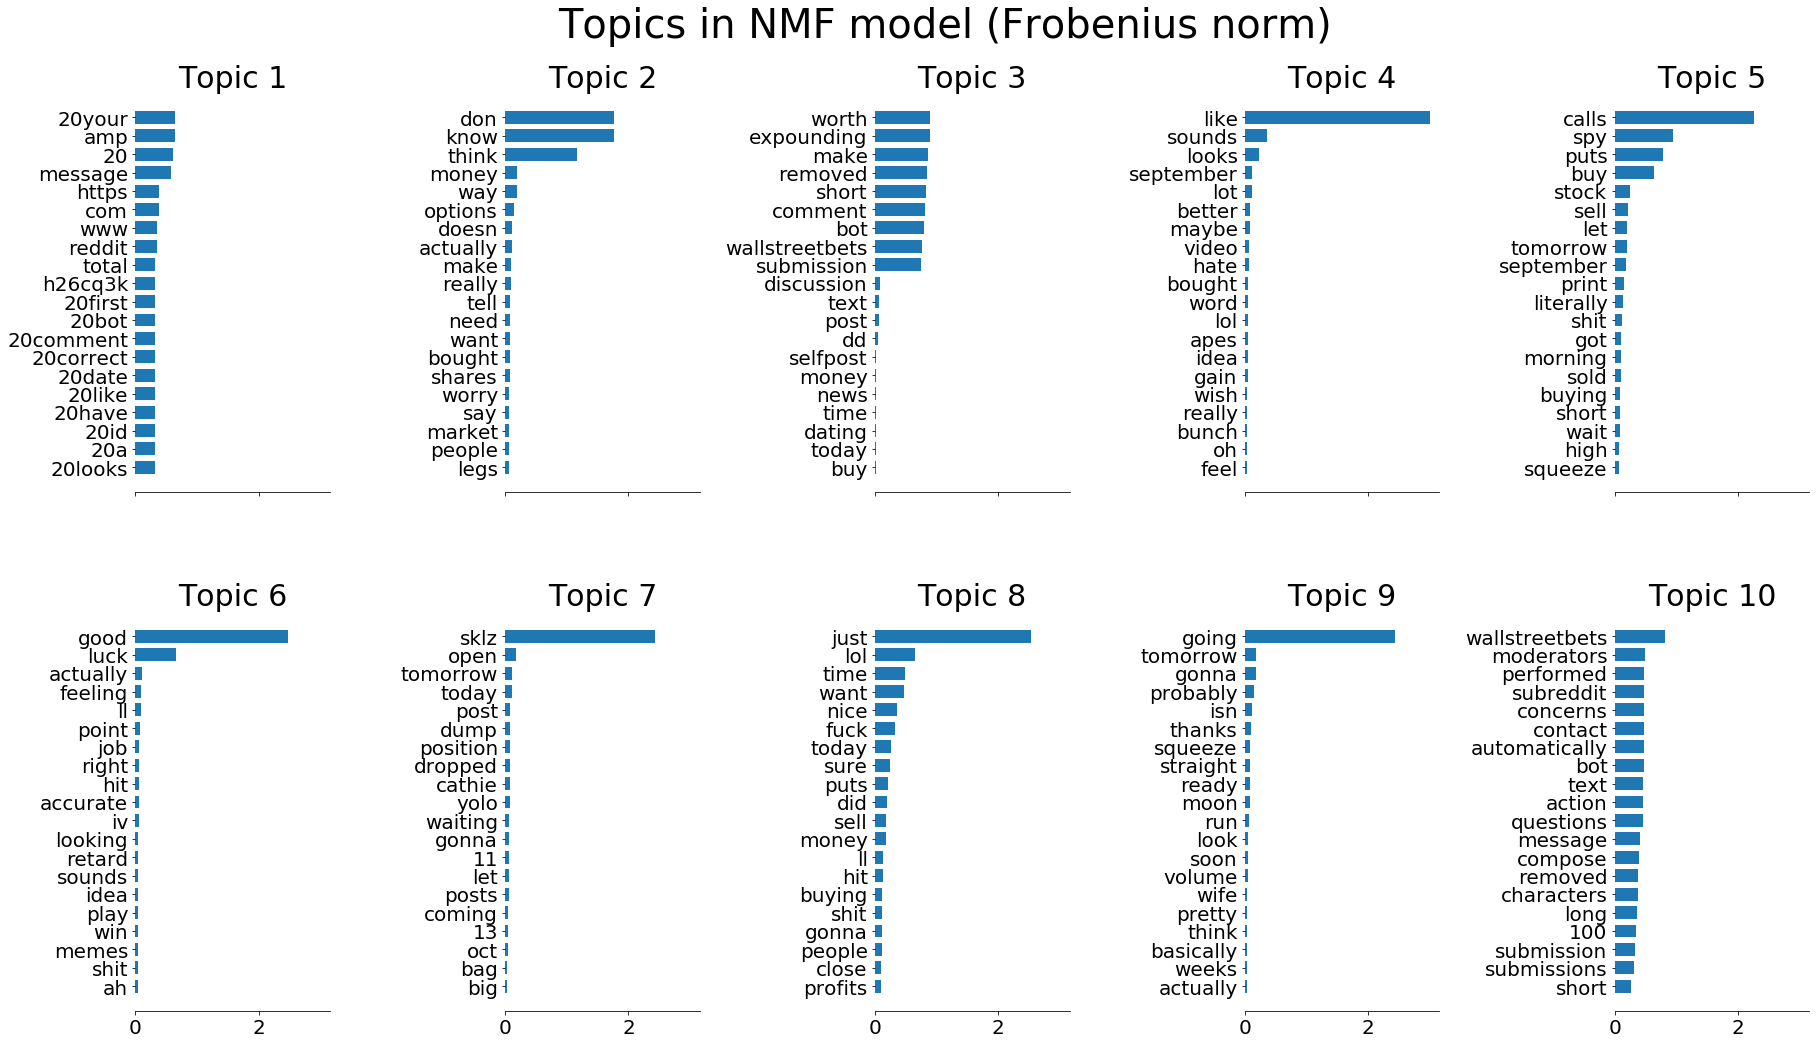



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.170s.


/home/sam/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


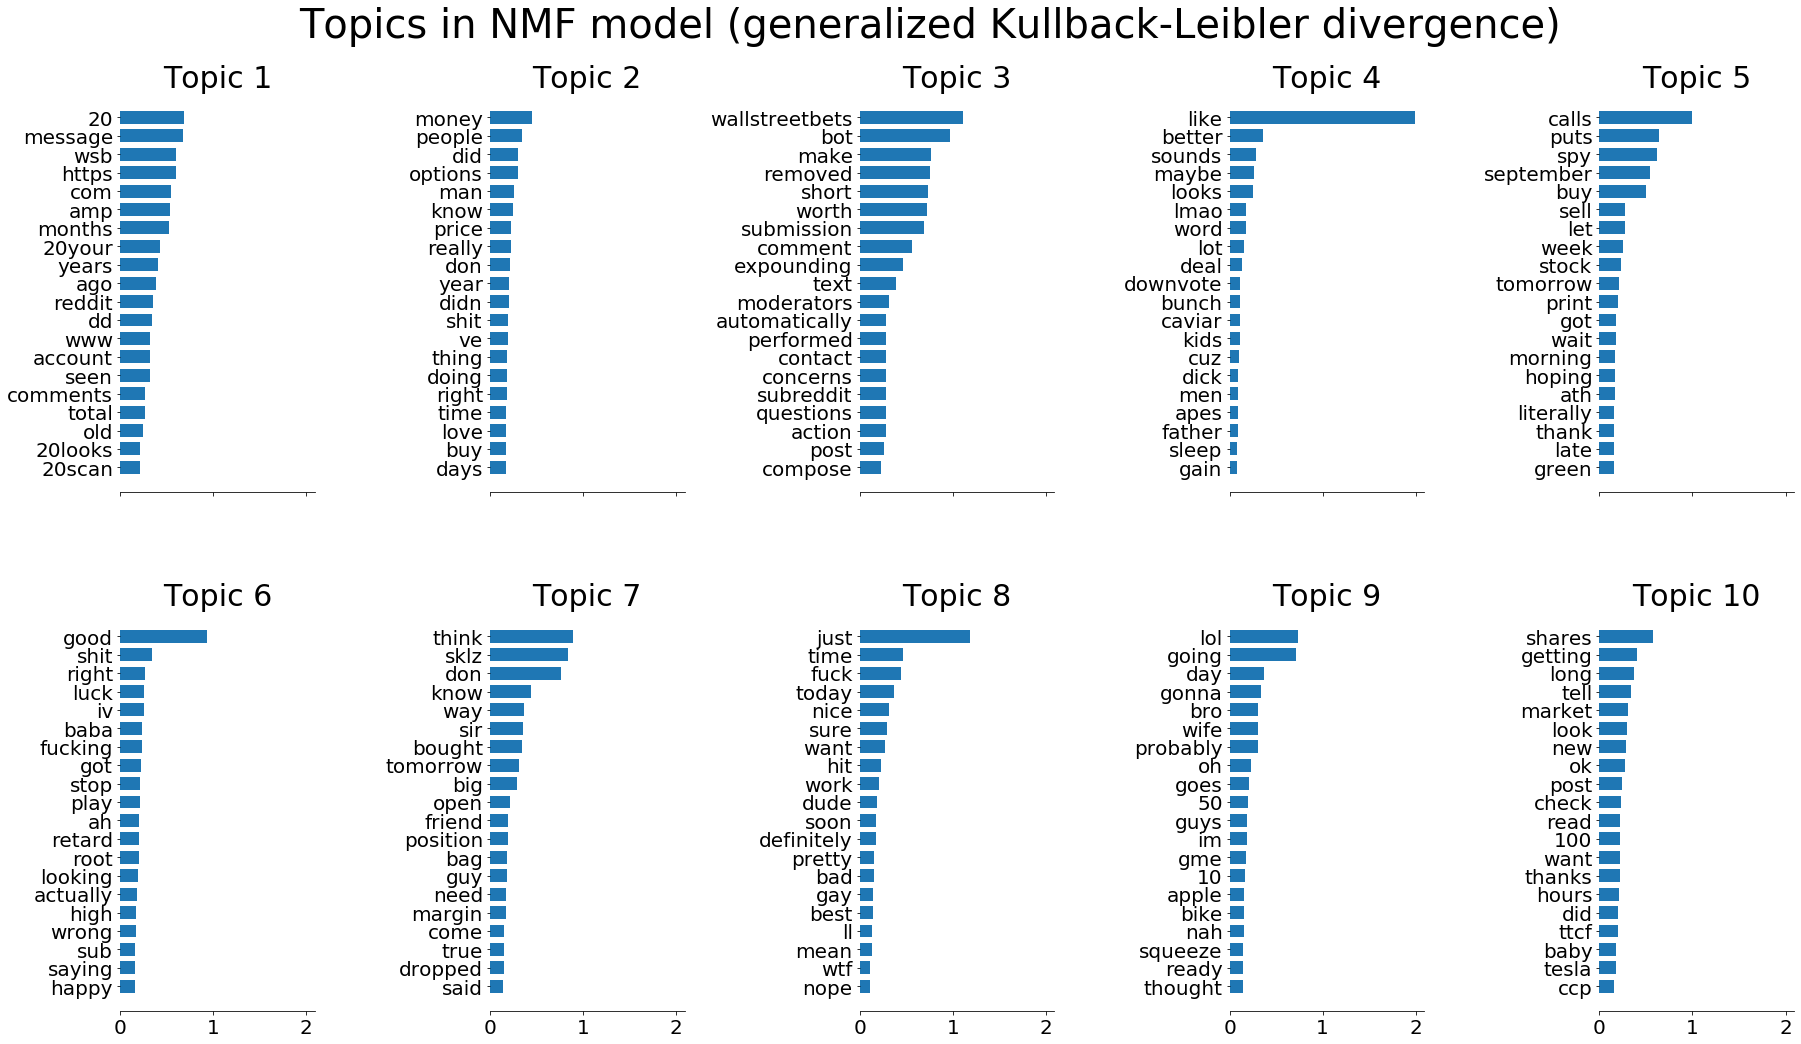



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 0.997s.


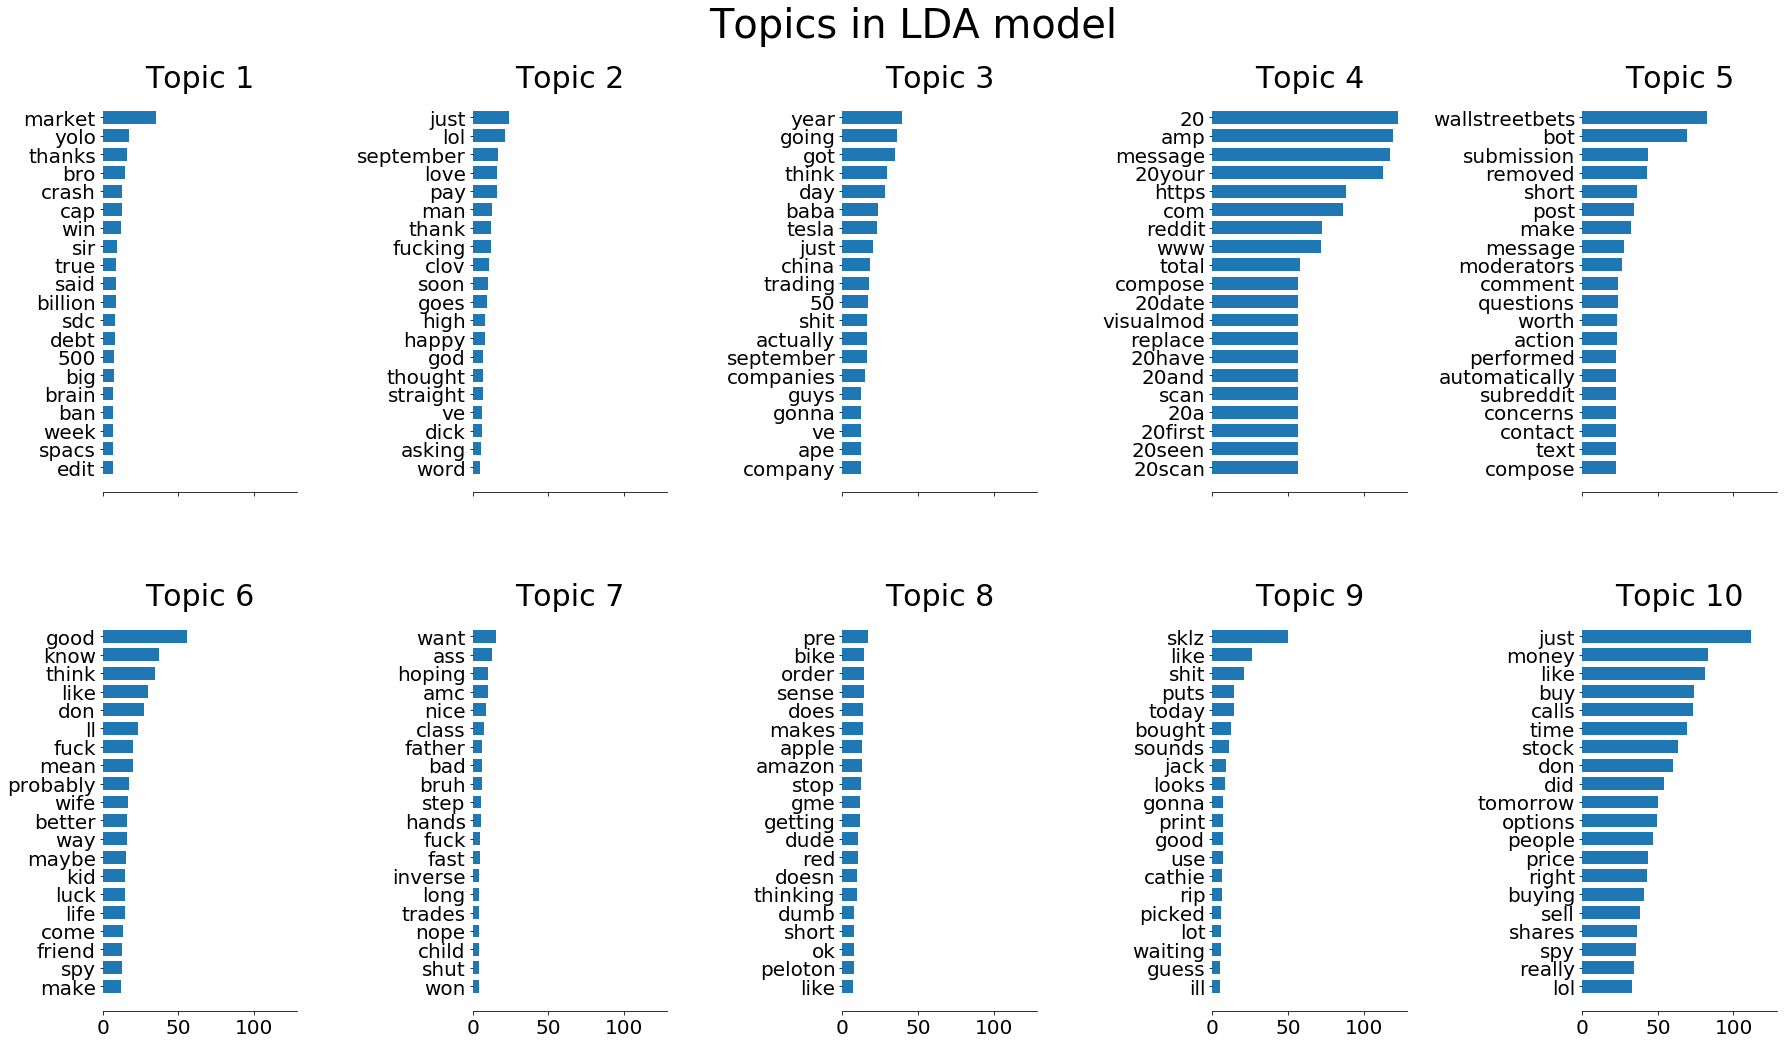

In [19]:
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.
print("Loading dataset...")
t0 = time()
data = df_comments['body'].values.tolist()
data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(n_components=n_components, random_state=1, alpha=0.1, l1_ratio=0.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha=0.1,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

In [20]:
data, _ = fetch_20newsgroups(
    shuffle=True,
    random_state=1,
    remove=("headers", "footers", "quotes"),
    return_X_y=True,
)
type(data)

list

In [21]:
type(fetch_20newsgroups(
    shuffle=True,
    random_state=1,
    remove=("headers", "footers", "quotes"),
    return_X_y=True,
))

tuple

In [22]:
dir()

['CountVectorizer',
 'Dictionary',
 'In',
 'LatentDirichletAllocation',
 'LdaModel',
 'NMF',
 'Out',
 'Phrases',
 'RegexpTokenizer',
 'TfidfVectorizer',
 'WordNetLemmatizer',
 '_',
 '_12',
 '_14',
 '_20',
 '_21',
 '_6',
 '_8',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'avg_topic_coherence',
 'bigram',
 'chunksize',
 'clean_posts',
 'comp',
 'comp_prices',
 'companies',
 'comps',
 'corpus',
 'dat',
 'data',
 'data_samples',
 'datetime',
 'df_comments',
 'df_connected_comments',
 'df_posts',
 'dictionary',
 'eval_every',
 'exit',
 'fetch_20newsgroups',
 'get_ipython',
 'id2word',
 'idx',
 'iterations',
 'lda',
 'model',
 'n_components',
 'n_features',
 'n_samples',
 'n_top_

In [23]:
data, _ = fetch_20newsgroups(
    shuffle=True,
    random_state=1,
    remove=("headers", "footers", "quotes"),
    return_X_y=True,
)
data_samples = data[:n_samples]